In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
    # N = len(data)

    # Get TV
    tv_data = get_column(data, 0)

    # Get Radio
    radio_data = get_column(data, 1)

    # Get Newspaper
    newspaper_data = get_column(data, 2)

    # Get Sales
    sales_data = get_column(data, 3)

    # Build X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [ ]:
X, y = prepare_data("./data/advertising.csv")
list_data = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list_data)


[624.1, 175.1, 300.5, 78.9]
200


In [5]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0

    w1, w2, w3, b = (
        0.016992259082509283,
        0.0070783670518262355,
        -0.002307860847821344,
        0,
    )
    return w1, w2, w3, b

In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result


y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [ ]:
def compute_loss(y_hat, y):
    # Mean Squared Error
    return (y_hat - y) ** 2


loss = compute_loss(1, 0.5)
print(loss)

0.25


In [ ]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi


def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

In [9]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [10]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [ ]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

In [12]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [13]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


In [19]:
print(len(y))

200


In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        print(f"----Epoch {epoch}----")
        for i in range(N):
            # Get sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b( y, y_hat)

            # update parameter
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
        print(f"Loss: {loss}")

    return w1, w2, w3, b, losses


In [27]:
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

----Epoch 0----
Loss 0: 35.88705145412275
----Epoch 1----
Loss 1: 35.68509778572818
----Epoch 2----
Loss 2: 34.46253755939457
----Epoch 3----
Loss 3: 33.86150503029204
----Epoch 4----
Loss 4: 33.57000377973616
----Epoch 5----
Loss 5: 33.4155497497633
----Epoch 6----
Loss 6: 33.3214595349716
----Epoch 7----
Loss 7: 33.25400823059532
----Epoch 8----
Loss 8: 33.198341429316024
----Epoch 9----
Loss 9: 33.14790845198783
----Epoch 10----
Loss 10: 33.09981879543388
----Epoch 11----
Loss 11: 33.0527966619299
----Epoch 12----
Loss 12: 33.00627885757336
----Epoch 13----
Loss 13: 32.960016728237974
----Epoch 14----
Loss 14: 32.91390046637394
----Epoch 15----
Loss 15: 32.867881557184255
----Epoch 16----
Loss 16: 32.82193854350329
----Epoch 17----
Loss 17: 32.776061912834315
----Epoch 18----
Loss 18: 32.73024742572979
----Epoch 19----
Loss 19: 32.68449317059323
----Epoch 20----
Loss 20: 32.6387982635126
----Epoch 21----
Loss 21: 32.59316227429787
----Epoch 22----
Loss 22: 32.54758497310441
----Epoc

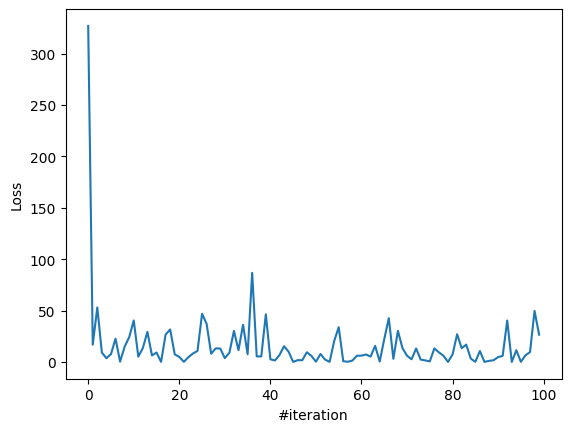

In [26]:
plt.plot(losses[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [28]:
tv = 19.2
radio = 35.9
newspaper = 51.3
(w1,w2,w3,b, losses) = implement_linear_regression(X,y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"Predicted Sales is {sales}")

----Epoch 0----
Loss 0: 35.88705145412275
----Epoch 1----
Loss 1: 35.68509778572818
----Epoch 2----
Loss 2: 34.46253755939457
----Epoch 3----
Loss 3: 33.86150503029204
----Epoch 4----
Loss 4: 33.57000377973616
----Epoch 5----
Loss 5: 33.4155497497633
----Epoch 6----
Loss 6: 33.3214595349716
----Epoch 7----
Loss 7: 33.25400823059532
----Epoch 8----
Loss 8: 33.198341429316024
----Epoch 9----
Loss 9: 33.14790845198783
----Epoch 10----
Loss 10: 33.09981879543388
----Epoch 11----
Loss 11: 33.0527966619299
----Epoch 12----
Loss 12: 33.00627885757336
----Epoch 13----
Loss 13: 32.960016728237974
----Epoch 14----
Loss 14: 32.91390046637394
----Epoch 15----
Loss 15: 32.867881557184255
----Epoch 16----
Loss 16: 32.82193854350329
----Epoch 17----
Loss 17: 32.776061912834315
----Epoch 18----
Loss 18: 32.73024742572979
----Epoch 19----
Loss 19: 32.68449317059323
----Epoch 20----
Loss 20: 32.6387982635126
----Epoch 21----
Loss 21: 32.59316227429787
----Epoch 22----
Loss 22: 32.54758497310441
----Epoc